### WEB SCRAPING JOB LISTINGS IN BRIGHTER MONDAY

Brighter Monday is one of the most popular job listing sites in Kenya. its sole purpose is to provide a platform for employers who can advertise jobs  and job seekers who can apply jobs. In this project we will scrap job title, company name , industry , salary range and location for the various jobs listed on the platform 

## Project Outline
1. Download all the pages into our local storage , they are about 80 pages
2. Iterate through the files in our local storage and read job_title,industry,company,location,job_type,salary_range
3. Load the information to a Pandas Dataframe 
4. perform basic analysis on the dataset

In [1]:
# Load necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [4]:

# def helper function to download web pages in our local storage
# we will dynamically build our url in order to scrap all pages
import time
def download_page():
    for i in range(1,81):
        url=f"https://www.brightermonday.co.ke/jobs?page={i}&_gl=1%2A1abrttm%2A_up%2AMQ..\
        &gclid=CjwKCAiA1fqrBhA1EiwAMU5m__3JSXtTeGz4ez4c9rjVI_Zzs3rBGjTHimobo2PPYs6VdwhwZvFtbxoCp1kQAvD_BwE"
        page=requests.get(url)
        time.sleep(1)
        with open(f'brighter_monday/page_{i}.html','w',encoding="utf8") as f:
            f.write(page.text)
            

In [5]:
# call our function to download web pages
download_page()

In [73]:
import os
frames=[]  # store our scrapped data loaded into a pandas data frame
def scrapper():
    for pages in os.listdir('brighter_monday'):
        with open(f'brighter_monday/{pages}','r',encoding="utf8") as f:
            page_html=f.read()
        soup=BeautifulSoup(page_html,"html.parser")
        # get all job title
        job_title=[element.text.strip('\n').split('-')[0] for element in 
                   soup.find_all("p",class_="text-lg font-medium break-words text-link-500")]
        #get industry names
        industry=[element.text.split(':')[1].strip('\n') for element in 
                  soup.find_all('p',class_="text-sm text-gray-500 text-loading-animate inline-block")]
        # get company names
        company=[element.text.strip('\n') for element in 
                  soup.find_all('a',class_="text-loading-animate text-loading-animate-link")]
        location=[element.select_one(":nth-child(1)").text.strip('\n') for element in 
                 soup.find_all('div',class_="flex flex-wrap mt-3 text-sm text-gray-500 md:py-0")]
        # get job type
        job_type=[element.select_one(":nth-child(2)").text.strip('\n') for element in 
                 soup.find_all('div',class_="flex flex-wrap mt-3 text-sm text-gray-500 md:py-0")]
        # get salary_range 
        salary_range=[element.select_one(":nth-child(3)").text.strip('\n').replace('KSh','').strip('\n') for element in 
                 soup.find_all('div',class_="flex flex-wrap mt-3 text-sm text-gray-500 md:py-0")]
        # load the information to  a pandas dataframe
        frame=pd.DataFrame(list(zip(job_title,industry,company,location,job_type,salary_range)),
                           columns=['job_title','industry','company','location','job_type','salary_range'])
        # append all our dataframes to a list
        frames.append(frame)

In [74]:
scrapper()

In [76]:
# lets merge  our list of dataframes to one dataframe
df=pd.concat(frames)
df

,job_title,industry,company,location,job_type,salary_range
0,Marketing Executive,Marketing & Communications,Wow pianos ltd,Nairobi,Full Time,Confidential
1,Marketing Executive,Marketing & Communications,Wow pianos ltd,Nairobi,Full Time,Confidential
2,SENIOR RECRUITER,Human Resources,The African Talent Company,Nairobi,Full Time,Confidential
3,Cluster Manager,Management & Business Development,City Walk Ltd,Nairobi,Full Time,"45,000 - 60,000"
4,Marketing Manager,Marketing & Communications,City Walk Ltd,Nairobi,Full Time,"75,000 - 90,000"
...,...,...,...,...,...,...
10,Sales Executive,Sales,Luanda Horticultural Farm,Nairobi,Full Time,"30,000 - 45,000"
11,POULTRY MANAGEMENT ASSISTANT.,Farming & Agriculture,Luanda Horticultural Farm,Rest of Kenya,Internship & Graduate,Confidential
12,Livestock Production Assistants,Farming & Agriculture,Luanda Horticultural Farm,Rest of Kenya,Internship & Graduate,Confidential
13,Horticultural Farm Assistants,Farming & Agriculture,Thornhill,Rest of Kenya,Internship & Graduate,Confidential


## Data Cleaning and Exploration

In [78]:
# checking shape of our data
df.shape

(448, 6)

In [79]:
# checking for null values
df.isnull().sum()

job_title       0
industry        0
company         0
location        0
job_type        0
salary_range    0
dtype: int64

In [81]:
# checking for duplicates
df.duplicated().any()

True

In [95]:
# dropping duplicates
df.drop_duplicates(inplace=True)
df

,job_title,industry,company,location,job_type,salary_range
0,Marketing Executive,Marketing & Communications,Wow pianos ltd,Nairobi,Full Time,Confidential
2,SENIOR RECRUITER,Human Resources,The African Talent Company,Nairobi,Full Time,Confidential
3,Cluster Manager,Management & Business Development,City Walk Ltd,Nairobi,Full Time,"45,000 - 60,000"
4,Marketing Manager,Marketing & Communications,City Walk Ltd,Nairobi,Full Time,"75,000 - 90,000"
5,Business to Business Sales Manager,Sales,City Walk Ltd,Nairobi,Full Time,"105,000 - 150,000"
...,...,...,...,...,...,...
10,Sales Executive,Sales,Luanda Horticultural Farm,Nairobi,Full Time,"30,000 - 45,000"
11,POULTRY MANAGEMENT ASSISTANT.,Farming & Agriculture,Luanda Horticultural Farm,Rest of Kenya,Internship & Graduate,Confidential
12,Livestock Production Assistants,Farming & Agriculture,Luanda Horticultural Farm,Rest of Kenya,Internship & Graduate,Confidential
13,Horticultural Farm Assistants,Farming & Agriculture,Thornhill,Rest of Kenya,Internship & Graduate,Confidential


In [96]:
# checking unique categories in job_title
df['job_title'].nunique()

403

In [97]:
# checking unique categories in industry
df['industry'].nunique()

25

In [98]:
# checking unique categories in company
df['company'].nunique()

213

In [99]:
# checking unique categories in location
df['location'].value_counts()

Nairobi                    272
Rest of Kenya              106
Outside Kenya               19
Kisumu                      18
Mombasa                      8
Remote (Work From Home)      6
Rest of Kenya (Eldoret)      4
Thika                        1
Nakuru                       1
Name: location, dtype: int64

In [104]:
# replacing rest of kenya (Eldoret) with Eldoret
df['location'].replace({'Rest of Kenya (Eldoret)':'Eldoret'},inplace=True)

## Visualization

Text(0.5, 1.0, 'Distribution of jobs by location')

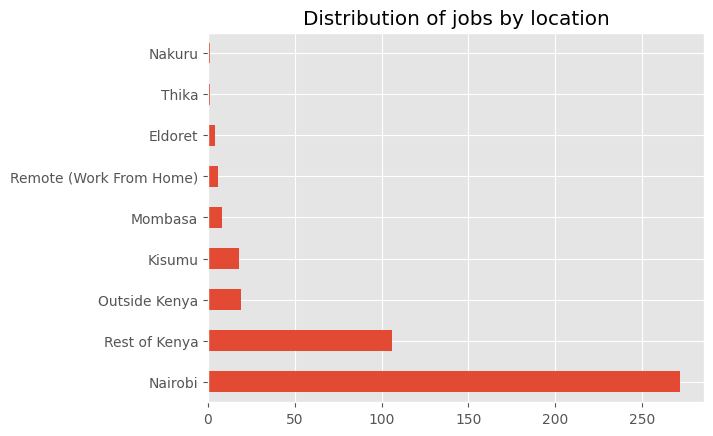

In [105]:
## Distribution of jobs by location
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df['location'].value_counts().plot.barh()
plt.title('Distribution of jobs by location')

Text(0.5, 1.0, 'Distribution of jobs by industry')

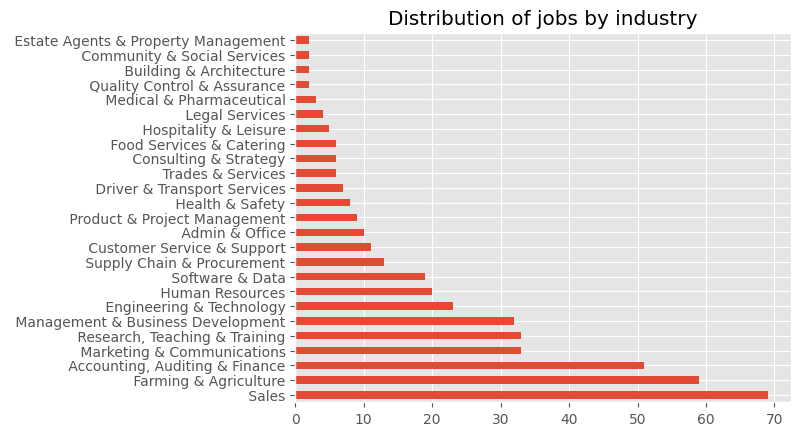

In [106]:

df['industry'].value_counts().plot.barh()
plt.title('Distribution of jobs by industry')

### Distribution of Jobs in Nairobi

Text(0.5, 1.0, 'Job distribution by Industry in Nairobi')

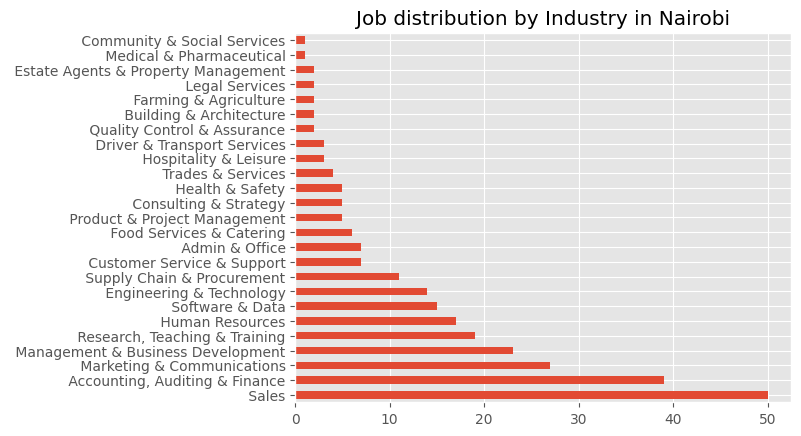

In [111]:
nairobi_df=df.query("location=='Nairobi'")
nairobi_df['industry'].value_counts().plot.barh()
plt.title("Job distribution by Industry in Nairobi")

### Job Distribution for Remote Works

Text(0.5, 1.0, 'Job distribution by industry for remote works')

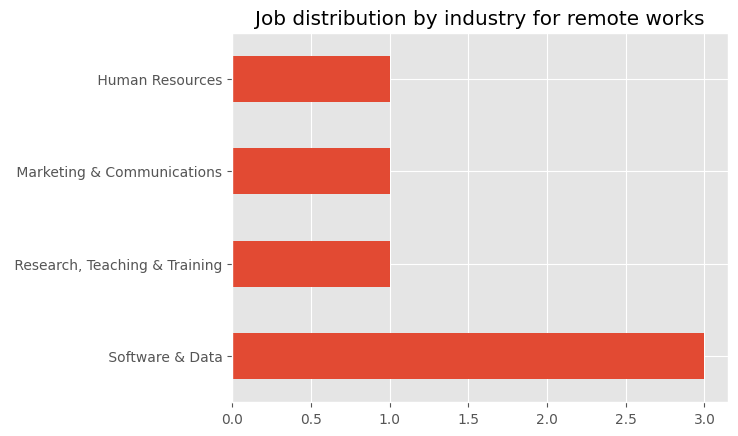

In [116]:
remote_df=df.query("location=='Remote (Work From Home)'")
remote_df['industry'].value_counts().plot.barh()
plt.title("Job distribution by industry for remote works")

#### This project can further be expanded to include other job listing sites in Kenya eg glassdor, indeed etc. from the analysis conducted most jobs fall under sales industry. Remote jobs in Kenya are mostly under software and Data industry